#**What is the impact of the playoffs on free throws?**

####This project is an analysis on how the playoffs affect free throw shooting. The goals of this project are to take a data set, `'free_throws.csv'` and clean it. Once, we clean it we will analyze the affects the playoffs have on free throw percentage. Then take that same analysis and go deeper into it's affects per season and per quarter. Each of these will give us seperate insight into what the playoffs really do to free throw percentage. In the end, we will bring all our findings together into an article and a presentation.

By Morgan Allen, Woo Seok Kim, & Thalia Dominguez-Sanchez

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/MATH_3439/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load the Data

In [ ]:
df = pd.read_csv(drive_dir + 'data/free_throws.csv')

In [ ]:
df.head()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
0,1,Andrew Bynum,0,1,LAL,PHX,1,0,114,106,47.000000,2006,1
1,1,Andrew Bynum,0,1,LAL,PHX,2,0,114,106,47.000000,2006,2
2,1,Andrew Bynum,0,1,LAL,PHX,12,18,114,106,29.733333,2006,1
3,1,Andrew Bynum,0,0,LAL,PHX,12,18,114,106,29.733333,2006,2
4,1,Shawn Marion,0,1,LAL,PHX,12,21,114,106,29.200000,2006,1


#Cleaning the Data

Let's take a look at how many rows and columns there are as well as what year this data is from.

In [ ]:
df.shape

(618019, 13)

In [ ]:
df['season_start'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

Now let's check if there are any None or NaN values in this dataset.

In [ ]:
df.isna().sum()

period               0
player               0
playoffs             0
shot_made            0
home_team            0
visit_team           0
home_score           0
visit_score          0
home_final_score     0
visit_final_score    0
minutes              0
season_start         0
shot_count           0
dtype: int64

So there are none which is awesome! Now we can change the dataset how we need to. We will only select the columns we need for analysis which are the columns `['period', 'player', 'playoffs', 'shot_made', 'season_start']`.

In [ ]:
df = df[['period', 'player', 'playoffs', 'shot_made', 'season_start']]
df.head()

,period,player,playoffs,shot_made,season_start
0,1,Andrew Bynum,0,1,2006
1,1,Andrew Bynum,0,1,2006
2,1,Andrew Bynum,0,1,2006
3,1,Andrew Bynum,0,0,2006
4,1,Shawn Marion,0,1,2006


Next, let's rename `'period'` to `'quarters'` since basketball is played in terms of quarters. Also let's make sure all the quarters are accounted for.

In [ ]:
df.columns = ['quarters', 'player', 'playoffs', 'shot_made', 'season_start']

In [ ]:
df['quarters'].value_counts()

4    186280
2    154218
3    154108
1    116962
5      5439
6       838
7       150
8        24
Name: quarters, dtype: int64

So we can see that `'quarters'` has numbers 5,6,7 and 8 which represent each overtime quarters those game went into. We want just one overtime quarter to represent all of these values so let's change 5,6,7 and 8 to all be quarter 5.

In [ ]:
df['quarters'] = df['quarters'].replace([6,7,8],5)
df['quarters'].value_counts()

4    186280
2    154218
3    154108
1    116962
5      6451
Name: quarters, dtype: int64

In [ ]:
df.head()

,quarters,player,playoffs,shot_made,season_start
0,1,Andrew Bynum,0,1,2006
1,1,Andrew Bynum,0,1,2006
2,1,Andrew Bynum,0,1,2006
3,1,Andrew Bynum,0,0,2006
4,1,Shawn Marion,0,1,2006


Last, let's check the other columns to make sure they are have correct possible values.

In [ ]:
df['playoffs'].value_counts()

0    575893
1     42126
Name: playoffs, dtype: int64

In [ ]:
df['shot_made'].value_counts()

1    467689
0    150330
Name: shot_made, dtype: int64

In [ ]:
df['season_start'].value_counts()

2006    67612
2007    65500
2008    65355
2009    64804
2010    64137
2013    62290
2015    61355
2014    60131
2012    58376
2011    48459
Name: season_start, dtype: int64

In [ ]:
df.dtypes

quarters         int64
player          object
playoffs         int64
shot_made        int64
season_start     int64
dtype: object

In [ ]:
df.to_csv('/content/drive/My Drive/cleaned_data.csv')

Everything looks good. Now we go to some analysis.

#Analysis

## Free Throw Percentage per Player
The goal of the first analysis is to make a histogram of each players individual free throw shooting percentage for both the regular season and the playoffs. Players must shoot more than 10 free throws to be in the graph.

First, seperate the data into two DataFrame's. One will have only the playoff data and the other the regular season.

In [ ]:
#Seperate the DataFrame into playoffs and regular season
playoff_df = df[df['playoffs']==1]
regular_df = df[df['playoffs']==0]

Next we will group each of the DataFrames by player. We will then count the total number of shots taken for both regular season and playoffs. And then sum the `'shot_made'` column for both. By summing it, it will add both zeros and ones so that variable will represent the free throws made for either regular season or playoffs.

In [ ]:
# Groupby player and then find the amound of shots made and taken
regular_players = regular_df.groupby(['player'])
total_reg_shots = regular_players['shot_made'].count()
total_reg_made = regular_players['shot_made'].sum()

In [ ]:
# This is the same but for playoffs
playoff_players = playoff_df.groupby(['player'])
total_playoff_shots = playoff_players['shot_made'].count()
total_playoff_made = playoff_players['shot_made'].sum()

In [ ]:
# Make sure the player shoot more than 10 shots
total_reg_shots = total_reg_shots[total_reg_shots>10]
total_playoff_shots = total_playoff_shots[total_playoff_shots>10]

Furthermore, we can now find the percentage of shots made per player by dividing the shots made by the shots taken.

In [ ]:
reg_pct_made = total_reg_made/total_reg_shots*100

In [ ]:
playoff_pct_made = total_playoff_made/total_playoff_shots*100

Now, we are able to graph this as two histograms on top of eachother. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

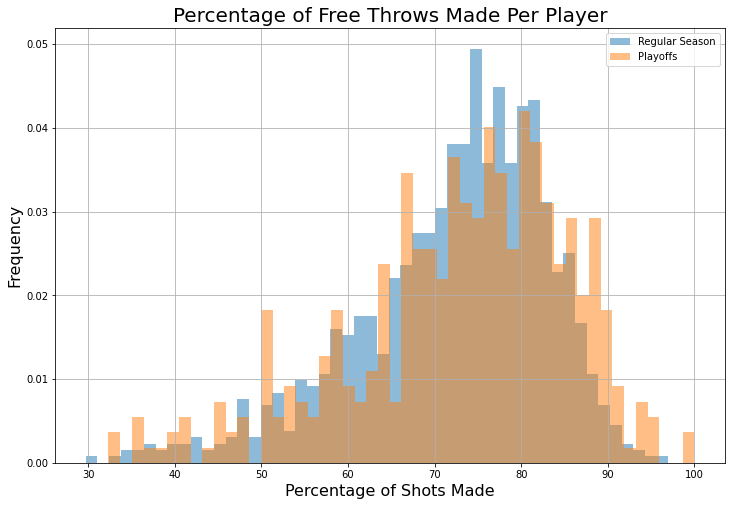

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(reg_pct_made, bins=50, alpha=0.5, label="Regular Season", density=True)
plt.hist(playoff_pct_made, bins=50, alpha=0.5, label="Playoffs", density=True)
plt.grid()
plt.legend()
plt.title('Percentage of Free Throws Made Per Player', fontsize =20)
plt.xlabel('Percentage of Shots Made', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Let's get one more look at the summary statistics to get a full view of what this histogram is telling us.

In [ ]:
reg_pct_made.describe()

count    977.000000
mean      72.155610
std       11.106802
min       29.729730
25%       66.233766
50%       74.193548
75%       80.212532
max       96.969697
Name: shot_made, dtype: float64

In [ ]:
playoff_pct_made.describe()

count    405.000000
mean      73.003350
std       12.890361
min       32.352941
25%       66.666667
50%       75.213675
75%       82.222222
max      100.000000
Name: shot_made, dtype: float64

##Free Throw Percentage by Season
For the second part of the analysis, we will first group the `'shot_made'`, and `'season_start'`columns to count how many shots were taken throughout the seasons in both the regular and playoffs season combined. 

In [ ]:
df.groupby(['season_start', 'shot_made']).size()

season_start  shot_made
2006          0            16771
              1            50841
2007          0            16006
              1            49494
2008          0            15035
              1            50320
2009          0            15651
              1            49153
2010          0            15124
              1            49013
2011          0            11993
              1            36466
2012          0            14495
              1            43881
2013          0            15163
              1            47127
2014          0            15126
              1            45005
2015          0            14966
              1            46389
dtype: int64

Next, we will separate the data into two different DataFrames. One for shots missed and the other for shots made. 

In [ ]:
# grouping the shots made and shots missed into different frames
shots_missed_df = df[df['shot_made']==0]
shots_made_df = df[df['shot_made']==1]

In [ ]:
# Grouping the shots missed by season
season_shot_missed = shots_missed_df.groupby(['season_start'])
season_shot_missed['season_start'].count()

season_start
2006    16771
2007    16006
2008    15035
2009    15651
2010    15124
2011    11993
2012    14495
2013    15163
2014    15126
2015    14966
Name: season_start, dtype: int64

In [ ]:
# Grouping the shots made by season
season_shot_make = shots_made_df.groupby(['season_start'])
season_shot_make['season_start'].count()

season_start
2006    50841
2007    49494
2008    50320
2009    49153
2010    49013
2011    36466
2012    43881
2013    47127
2014    45005
2015    46389
Name: season_start, dtype: int64

Then, we will total the shots made and missed. We will use this information to find the percentage of shots made and missed per season. 

In [ ]:
# Adding up the total shots, both missed and made, by season
total_shots_per_s = season_shot_missed['season_start'].count() + season_shot_make['season_start'].count()

In [ ]:
# Total of percent shots missed per season
pct_shots_missed = season_shot_missed['season_start'].count() / total_shots_per_s * 100 


In [ ]:
# Percent shots made per season
pct_shots_make = season_shot_make['season_start'].count() / total_shots_per_s * 100 

We are now able to plot the number and the percentage of shots taken per season. 

Text(0, 0.5, 'Shots taken')

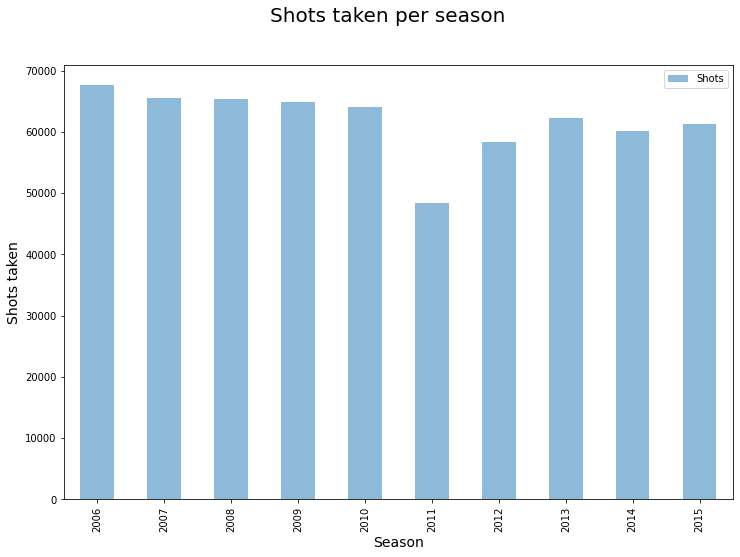

In [ ]:
# Total number of shots made and missed each season
fig = plt.figure(figsize=(12, 8)) 
ax = total_shots_per_s.plot(kind='bar', legend=True, alpha=0.5, label='Shots')
fig.suptitle('Shots taken per season', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Shots taken', fontsize=14)

Text(0, 0.5, 'Percent of Shots')

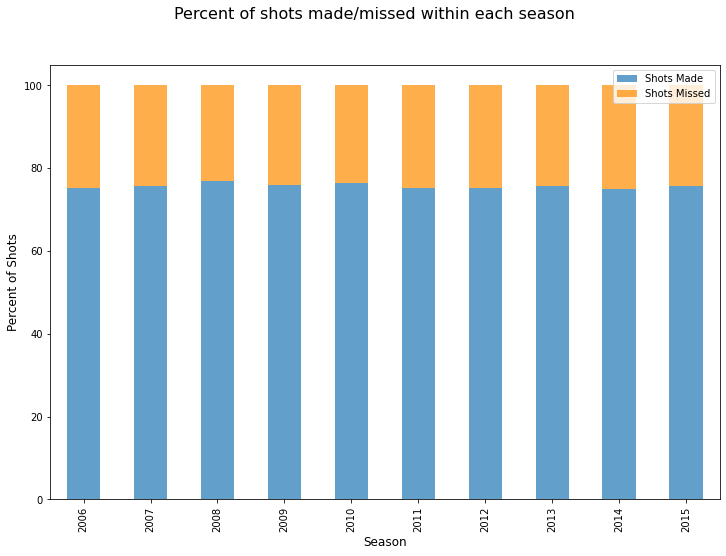

In [ ]:
fig = plt.figure(figsize=(12, 8)) 
ax = pct_shots_make.plot(kind='bar', legend=True, alpha=0.7, label='Shots Made')
pct_shots_missed.plot(kind='bar', color= 'darkorange', legend=True, alpha=0.7, bottom=pct_shots_make, label='Shots Missed')
fig.suptitle('Percent of shots made/missed within each season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percent of Shots', fontsize=12)

Furthermore, we can group the the shots taken in playoffs per season into one DataFrame and group the shots taken in regular season into another. 

In [ ]:
# Grouping shots taken by regular and playoffs season
reg_season_df = df[df['playoffs']==0]
playoff_season_df = df[df['playoffs']==1]

In [ ]:
# shots taken in regular season by date of season 
reg_season_shotsTaken = reg_season_df.groupby(['season_start'])
reg_season_shotsTaken['season_start'].count()

season_start
2006    63496
2007    61116
2008    60900
2009    60357
2010    59952
2011    44487
2012    54298
2013    57901
2014    56082
2015    57304
Name: season_start, dtype: int64

In [ ]:
# shots taken in playoff season by date of season
playoff_season_shotsTaken = playoff_season_df.groupby(['season_start'])
playoff_season_shotsTaken['season_start'].count()

season_start
2006    4116
2007    4384
2008    4455
2009    4447
2010    4185
2011    3972
2012    4078
2013    4389
2014    4049
2015    4051
Name: season_start, dtype: int64

Once more, we can find the total and the percent of shots taken for both the regular and playoffs season. 

In [ ]:
# Adding up the total shots, both missed and made, in both types of season (playoffs and regular)
total_shots_reg_play = reg_season_shotsTaken['season_start'].count() + playoff_season_shotsTaken['season_start'].count()

In [ ]:
# Percent shots made during playoffs
pct_shots_p_Taken = playoff_season_shotsTaken['season_start'].count() / total_shots_reg_play * 100 


In [ ]:
# Percent shots made during regular
pct_shots_reg_Taken = reg_season_shotsTaken['season_start'].count() / total_shots_reg_play * 100 


The following are bar plots that show the percentage of shots taken in both regular and playoffs seasons, the total number of shots taken for both the regular and playoff seasons, the number of shots made and missed during playoffs, and the number of shots made and missed during regular seasons, respectively. 

Text(0, 0.5, 'Percent of shots taken')

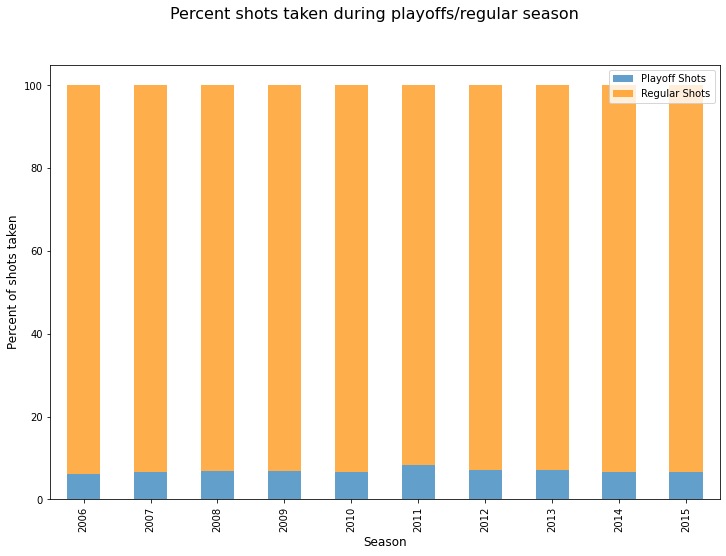

In [ ]:
# Plots the percent of shots taken during playoffs/regular 
fig = plt.figure(figsize=(12, 8)) 
ax = pct_shots_p_Taken.plot(kind='bar', legend=True, alpha=0.7, label='Playoff Shots')
pct_shots_reg_Taken.plot(kind='bar', color='darkorange', bottom=pct_shots_p_Taken, legend=True, alpha=0.7, label='Regular Shots')
fig.suptitle('Percent shots taken during playoffs/regular season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percent of shots taken', fontsize=12)

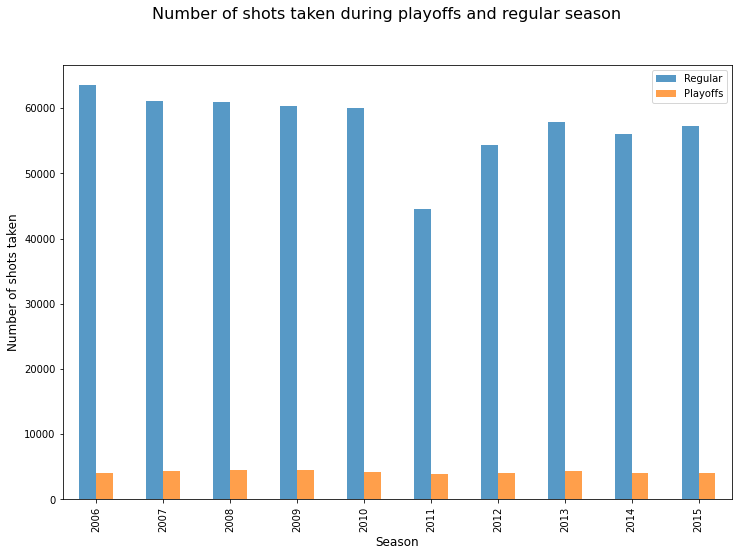

In [ ]:
# Plots the number of shots taken on playoffs/regular season per date of season
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(['season_start','playoffs']).count()['shot_made'].unstack().plot(ax=ax, kind='bar', alpha=0.75, legend=True)
fig.suptitle('Number of shots taken during playoffs and regular season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of shots taken', fontsize=12)
L=plt.legend()
L.get_texts()[0].set_text('Regular')
L.get_texts()[1].set_text('Playoffs')

In [ ]:
def shot_made_missed(df, title):
  fig, ax = plt.subplots(figsize=(12,8))
  df.groupby(['season_start', 'shot_made']).size().unstack().plot.bar(ax=ax, legend=True)
  fig.suptitle(title, fontsize=16)
  plt.xlabel('Season', fontsize=12)
  plt.ylabel('Number of shots made', fontsize=12)
  L=plt.legend()
  L.get_texts()[1].set_text('Made')
  L.get_texts()[0].set_text('Missed')

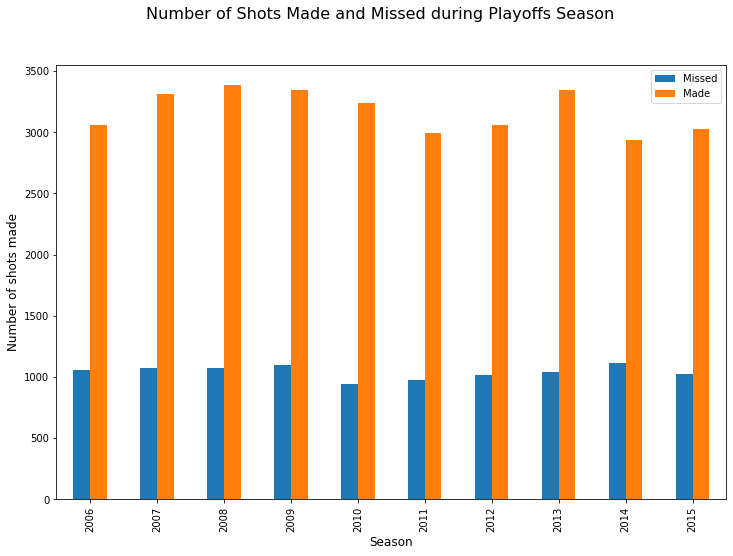

In [ ]:
# Plots number of shots made and missed during Playoff season
shot_made_missed(df = playoff_season_df, title = 'Number of Shots Made and Missed during Playoffs Season')

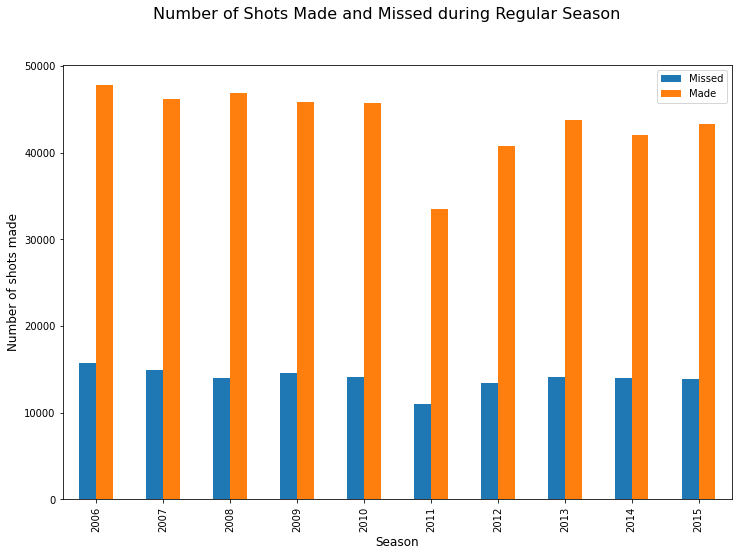

In [ ]:
# Plots number of shots made and missed during Regular season
shot_made_missed(df = reg_season_df, title = 'Number of Shots Made and Missed during Regular Season')

Lastly, we are going to take a quick look at a line plot. This line plot will show us the percentage of shots made in the regular season and playoffs per year. First, we will pull all the seasons each shot was taken.

In [ ]:
regular_season_df = regular_df['season_start']
playoff_season_df = playoff_df['season_start']

Next, we are going to pull only the shots that were made and then find which season those were in.

In [ ]:
#Shots Made
regular_shot_df = regular_df[regular_df['shot_made']==1]
playoff_shot_df = playoff_df[playoff_df['shot_made']==1]

#Season Start of those shots that were made
regular_shot_season_df = regular_shot_df['season_start']
playoff_shot_season_df = playoff_shot_df['season_start']

Furthermore, now we can find the percent of shots made per season by counting the number of shots made per season divided by the total of number of shots taken per season.

In [ ]:
#Percentage of shot made per season in the regular season
pct_regular_shot_season_df= 100*regular_shot_season_df.value_counts()/regular_season_df.value_counts()

#Percentage of shot made per season in the playoffs
pct_playoff_shot_season_df= 100*playoff_shot_season_df.value_counts()/playoff_season_df.value_counts()

Now we can make our line plot!

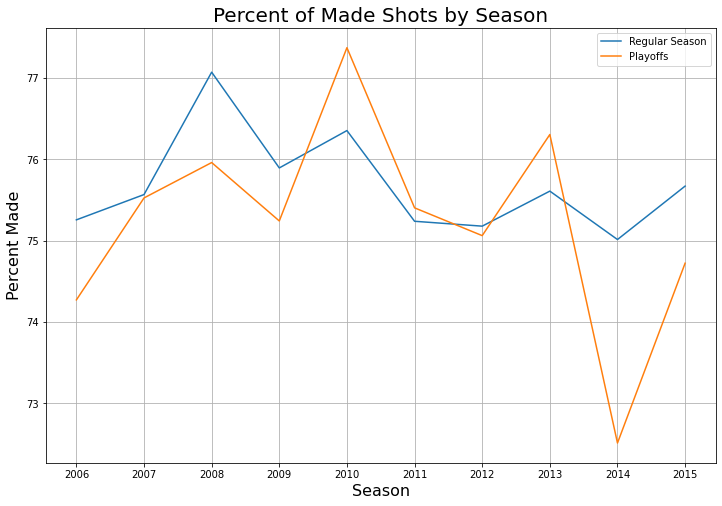

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pct_regular_shot_season_df.index, pct_regular_shot_season_df, label='Regular Season' )
plt.plot(pct_playoff_shot_season_df.index, pct_playoff_shot_season_df, label= 'Playoffs')
plt.xticks(ticks=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
plt.title('Percent of Made Shots by Season', fontsize=20)
plt.legend()
plt.ylabel('Percent Made', fontsize=16)
plt.xlabel('Season', fontsize=16)
plt.grid()

##Free Throw Percentage by Quarter
Now let's dive into an analysis on how free throw percentage is changed by quarter.

First, we need to create two dataframs containing the data on which quarter the shot was taken in.

In [ ]:
regular_quarters_df = regular_df['quarters']
playoff_quarters_df = playoff_df['quarters']

Next, we can find the amount of shots made for both regular season and playoffs. Then we can see which quarters the shots that were made were in.

In [ ]:
#Shot made counting

regular_shot_made_df = regular_df[regular_df['shot_made']==1]
playoff_shot_made_df = playoff_df[playoff_df['shot_made']==1]

regular_shot_quarters_df = regular_shot_made_df['quarters']
playoff_shot_quarters_df = playoff_shot_made_df['quarters']

Now that we have this, we can find the percent of shots made in the regular season and playoffs per quarter by taking the amount of shots made per quarter and dividing it by the total number of shots per quarter.

In [ ]:
#Percentage of shot made per quarters (Reg)
pct_regular_shot_quarters_df= 100*regular_shot_quarters_df.value_counts()/regular_quarters_df.value_counts()

#Percentage of shot made per quarters (POs)
pct_playoff_shot_quarters_df= 100*playoff_shot_quarters_df.value_counts()/playoff_quarters_df.value_counts()

Now, we are able to graph a few things. First will be the amount of free throw shots taken per quarter.

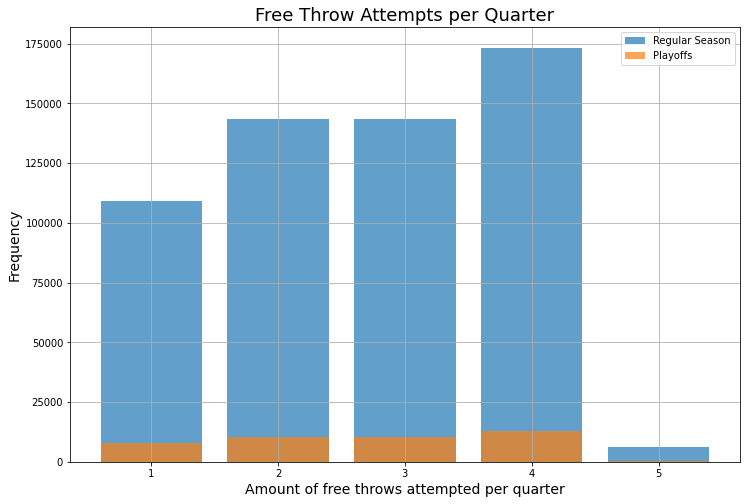

In [ ]:
#This gets our x and y values for the graph
u, counts = np.unique(regular_quarters_df, return_counts=True)
t, count = np.unique(playoff_quarters_df, return_counts=True)

#Let's Graph
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(u)), counts, alpha=.7, label="Regular Season")
plt.bar(np.arange(len(t)), count, alpha=.7, label = 'Playoffs')
plt.xticks(np.arange(len(u)), u)
plt.xlabel('Amount of free throws attempted per quarter', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)
plt.title('Free Throw Attempts per Quarter', fontsize= 18)
plt.grid()
plt.legend()

Next, we can normalize the graph and get a better view of how regular season and playoff percent of shot taken compares across quarters.

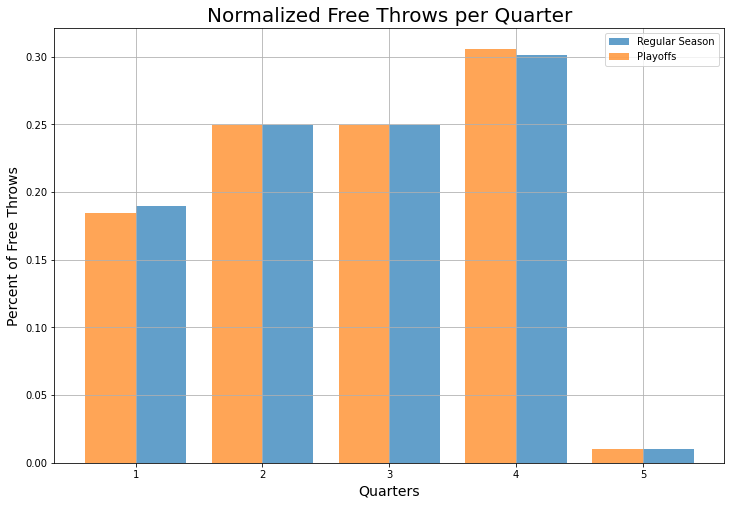

In [ ]:
#This makes a list with all the quarters
quarter_num = [1,2,3,4,5]

#Now we can make lists for the percentage of shots per quarter
regular_freq=[]
playoff_freq=[]
for i in range(1,6):
  regular_freq.append(regular_quarters_df.value_counts()[i] / regular_quarters_df.count())
  playoff_freq.append(playoff_quarters_df.value_counts()[i] / playoff_quarters_df.count())

# Graphing a bar graph
plt.figure(figsize=(12,8))
plt.bar(quarter_num, regular_freq, width=0.4, align='edge', label='Regular Season', alpha=0.7)
plt.bar(quarter_num, playoff_freq, width=-0.4, align='edge', label='Playoffs', alpha=0.7)
plt.title("Normalized Free Throws per Quarter", fontsize=20)
plt.xlabel("Quarters", fontsize=14)
plt.ylabel("Percent of Free Throws", fontsize=14)
plt.xticks(range(1, 6))
plt.grid()
plt.legend()

Lastly, we want to make one more graph that is a line plot. This line plot will show the percentage of regular season and playoff free throws made per quarter. 

The series below needs to be rearranged from 1-5.

In [ ]:
pct_playoff_shot_quarters_df

4    75.579862
3    75.420587
2    74.509617
1    75.269923
5    79.861111
Name: quarters, dtype: float64

This moves the index of `pct_po_shot_quarters_df` into the correct order so it shows us well in the line graph.

In [ ]:
#Make new array in the correct order we can make into a series
data = np.array([pct_playoff_shot_quarters_df[1],
                  pct_playoff_shot_quarters_df[2],
                  pct_playoff_shot_quarters_df[3],
                  pct_playoff_shot_quarters_df[4],
                  pct_playoff_shot_quarters_df[5]])

pct_playoff_shot_quarters_df = pd.Series(data)

pct_playoff_shot_quarters_df.index +=1

Now we are able to make the line plot.

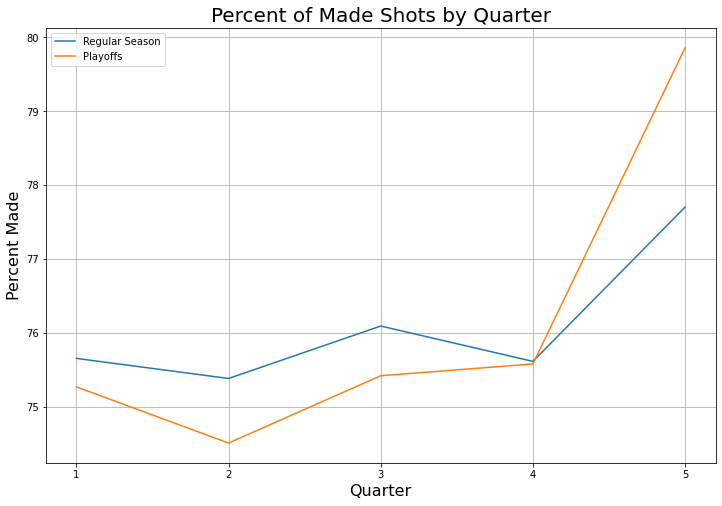

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(pct_regular_shot_quarters_df.index, pct_regular_shot_quarters_df, label='Regular Season' )
plt.plot(pct_playoff_shot_quarters_df.index, pct_playoff_shot_quarters_df, label= 'Playoffs')
plt.xticks(ticks=[1,2,3,4,5])
plt.title('Percent of Made Shots by Quarter', fontsize=20)
plt.legend()
plt.ylabel('Percent Made', fontsize=16)
plt.xlabel('Quarter', fontsize=16)
plt.grid()

Let's take one more closer look at the numbers in this graph to get the full picture.

In [ ]:
pct_playoff_shot_quarters_df

1    75.269923
2    74.509617
3    75.420587
4    75.579862
5    79.861111
dtype: float64

In [ ]:
pct_regular_shot_quarters_df

1    75.655328
2    75.383395
3    76.093240
4    75.614947
5    77.703938
Name: quarters, dtype: float64